In [1]:
import scanpy as sc
import numpy as np
import random
import anndata as ad
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)

age = "P38"
rearing = "NR"

adata = {"Glut" : [], "GABA" : [], "Non" : []}

adata["Glut"] = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/{0}{1}/{0}_glut.h5ad".format(age, rearing))
adata["GABA"] = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/{0}{1}/{0}_gaba.h5ad".format(age, rearing))
adata["Non"] = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/{0}{1}/{0}_non.h5ad".format(age, rearing))

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


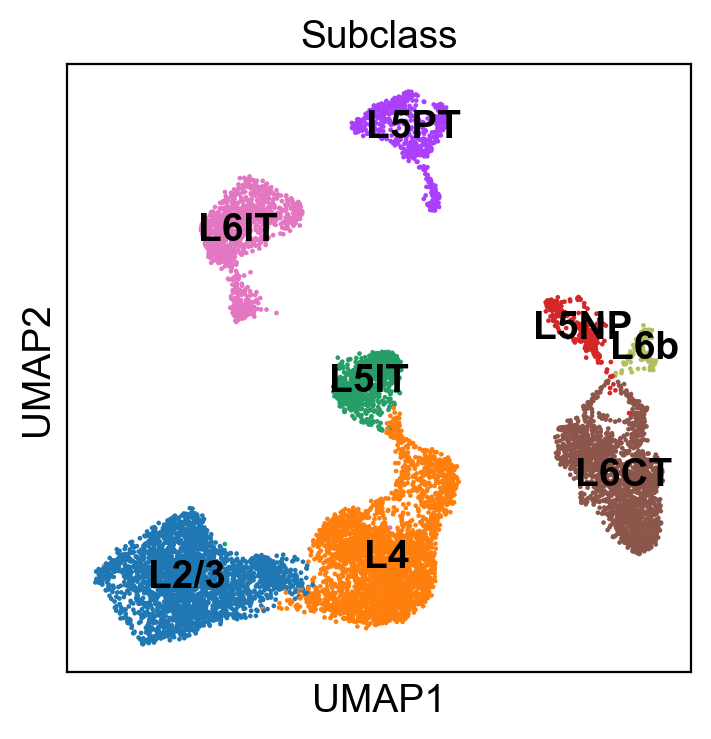

sample  Subclass
P38_1a  L2/3         720
        L4           831
        L5IT         195
        L5NP          97
        L5PT         163
        L6CT         305
        L6IT         243
        L6b           46
P38_2a  L2/3        1023
        L4          1175
        L5IT         263
        L5NP         104
        L5PT         219
        L6CT         779
        L6IT         449
        L6b           41
P38_2b  L2/3         954
        L4          1133
        L5IT         243
        L5NP         110
        L5PT         218
        L6CT         722
        L6IT         400
        L6b           52
dtype: int64

In [2]:
sc.pl.umap(adata["Glut"], color=["Subclass"], legend_loc="on data")
adata["Glut"].obs.groupby(["sample", "Subclass"]).size()

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


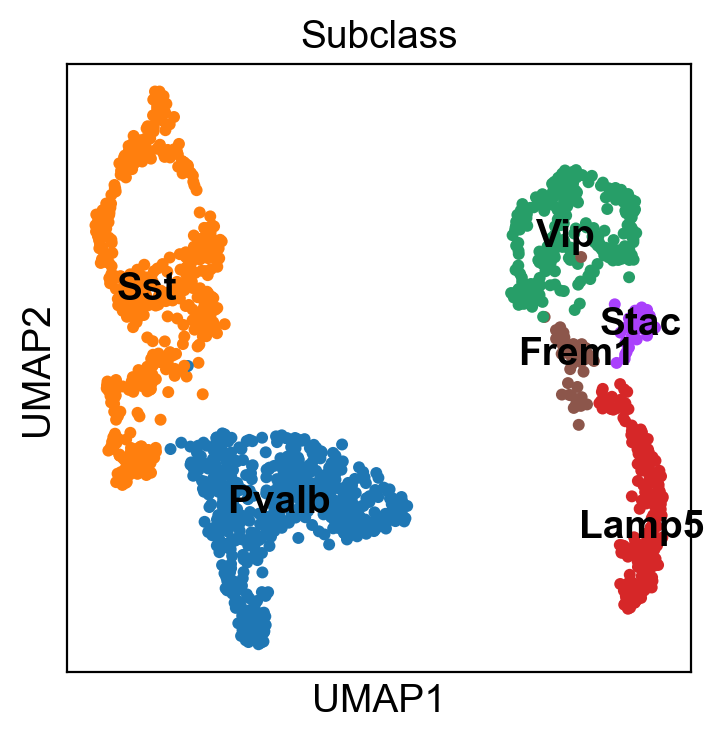

sample  Subclass
P38_1a  Pvalb       128
        Sst         117
        Vip          69
        Lamp5        40
        Stac         14
        Frem1        11
P38_2a  Pvalb       209
        Sst         188
        Vip         106
        Lamp5        79
        Stac         20
        Frem1        23
P38_2b  Pvalb       219
        Sst         181
        Vip         100
        Lamp5        85
        Stac         12
        Frem1        18
dtype: int64

In [3]:
sc.pl.umap(adata["GABA"], color=["Subclass"], legend_loc="on data")
adata["GABA"].obs.groupby(["sample", "Subclass"]).size()

In [2]:
import pandas as pd
counts_raw = pd.read_csv("E:/Transcriptomics_V1/Mouse/{0}{1}/GSE190940_{0}{1}.csv".format(age, rearing))
counts = counts_raw.copy()
counts.index = np.array(counts_raw["Unnamed: 0"])
counts = counts[counts.columns[1:]]

In [34]:
# if the index is weird
adata["GABA"].obs.index = pd.Index([bc[:29] for bc in adata["GABA"].obs.index])
adata["GABA"].obs

,batch,n_genes,percent_mito,n_counts,leiden,Doublet,Doublet Score,Class_broad,sample,Subclass,Age,Type
AAAGGATAGTTAGAAC-1-P38_1a-P38,5,2104,0.000758,5274.0,12,False,0.016393,Inhibitory,P38_1a,Sst,P38,Sst_E
GATGAGGGTTCGTTCC-1-P38_1a-P38,5,2419,0.000499,6008.0,8,False,0.022895,Inhibitory,P38_1a,Sst,P38,Sst_B
TTACCATGTGCACATT-1-P38_2a-P38,5,2249,0.000591,5078.0,10,False,0.016425,Inhibitory,P38_2a,Vip,P38,Vip_C
GGCTGTGAGATACATG-1-P38_2a-P38,5,3099,0.001163,7739.0,3,False,0.003504,Inhibitory,P38_2a,Sst,P38,Sst_C
GTGCGTGTCGAGATAA-1-P38_2a-P38,5,1929,0.001039,3851.0,15,False,0.077678,Inhibitory,P38_2a,Stac,P38,Stac
...,...,...,...,...,...,...,...,...,...,...,...,...
AGGCCACGTTGCTAGT-1-P38_2a-P38,5,3516,0.000697,10044.0,3,False,0.003504,Inhibitory,P38_2a,Sst,P38,Sst_C
CGGCAGTTCAAACGAA-1-P38_2b-P38,5,3406,0.000760,9207.0,13,False,0.031878,Inhibitory,P38_2b,Sst,P38,Sst_D
ATCCCTGTCCAGTTCC-1-P38_2b-P38,5,3858,0.000673,11895.0,1,False,0.004539,Inhibitory,P38_2b,Pvalb,P38,Pvalb_D
TCGGGCAGTGGTAATA-1-P38_1a-P38,5,2415,0.000485,6190.0,0,False,0.025705,Inhibitory,P38_1a,Pvalb,P38,Pvalb_B


In [35]:
adata_concat = ad.concat((adata["Glut"], adata["GABA"], adata["Non"]), label="Class", keys=("glutamatergic", "gabaergic", "nonneuronal"), join="outer")

In [ ]:
from scipy.sparse import csc_matrix
from scipy.io import mmwrite
import gzip
import shutil

def compress_file(input_filename, output_filename):
    with open(input_filename, 'rb') as f_in:
        with gzip.open(output_filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
   
for sample in np.unique(adata_concat.obs["sample"]):
    temp_adata = adata_concat[adata_concat.obs["sample"] == sample, :].copy()
    path = "E:/Transcriptomics_V1/Mouse/{0}{1}/filtered_feature_bc_matrix/".format(age, rearing) + sample + "/"
    print(temp_adata)
    # print(np.unique(temp_adata.obs[["Subclass"]]))
    # bcs = [bc.replace("-P8_glut-0-0", "") for bc in temp_adata.obs.index.to_list()]
    # bcs = [bc[:29] for bc in temp_adata.obs.index.to_list()]
    bcs = [bc[:29] for bc in counts.index.to_list() if sample in bc]
    gns = temp_adata.var.index.to_list()
    X = counts.loc[bcs][gns]
    mmwrite(path + "matrix.mtx", csc_matrix(X.values, dtype=np.int64).T, precision=1)
    X.columns.to_frame().to_csv(path + "features.tsv", index=False, header=False)
    X.index.to_frame().to_csv(path + "barcodes.tsv", index=False, header=False)
    # Save class
    Class = pd.DataFrame(np.nan, index=X.index, columns=["Class"])
    Class["Class"] = temp_adata.obs[["Class"]]
    Class["Class"] = pd.Categorical(Class["Class"], categories=list(np.unique(temp_adata.obs[["Class"]])) + ["ambiguous"])
    Class.loc[Class["Class"].isnull(), "Class"] = "ambiguous"
    Class.to_csv(path + "class.csv", index=False, header=False)
    # Save subclass
    Subclass = pd.DataFrame(np.nan, index=X.index, columns=["Subclass"])
    Subclass["Subclass"] = temp_adata.obs[["Subclass"]]
    Subclass["Subclass"] = pd.Categorical(Subclass["Subclass"], categories=list(np.unique(temp_adata.obs[["Subclass"]])) + ["ambiguous"])
    Subclass.loc[Subclass["Subclass"].isnull(), "Subclass"] = "ambiguous"
    # print(np.unique(Subclass[["Subclass"]]))
    Subclass.to_csv(path + "subclass.csv", index=False, header=False)
    # Save type
    Type = pd.DataFrame(np.nan, index=X.index, columns=["Type"])
    Type["Type"] = temp_adata.obs[["Type"]]
    Type["Type"] = pd.Categorical(Type["Type"], categories=list(np.unique(temp_adata.obs[["Type"]])) + ["ambiguous"])
    Type.loc[Type["Type"].isnull(), "Type"] = "ambiguous"
    Type.to_csv(path + "type.csv", index=False, header=False)
    for fl in ["matrix.mtx", "features.tsv", "barcodes.tsv"]:
        compress_file(path + fl, path + fl + ".gz")